# World Economic Report Analysis

## Preparing and QA Data

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Setting Up style

plt.style.use("my_dark_creative.mplstyle")

In [2]:
# Importing Dataset world Bank Excel File

path = '../Data/World+Economic+Indicators/WorldBank.xlsx'


# Creating new column and renaming existing columns for better maneuverability

world_bank = pd.read_excel(path, parse_dates=['Year']).assign(
    population_millions = lambda x : x['GDP (USD)'] / (x['GDP per capita (USD)'] * 1000000)
).rename(columns = {
    'Country Name' : 'country',
    'Country Code' : 'country_code',
    'Region' : 'region',
    'IncomeGroup' : 'income_group',
    'Year' : 'year',
    'Birth rate, crude (per 1,000 people)' : 'birth_rate_1000_people',
    'Death rate, crude (per 1,000 people)' : 'death_rate_1000_people',
    'Electric power consumption (kWh per capita)' : 'electric_power_consumption_kwh',
    "individuals using the Internet (% of population)" : 'individuals_using_internet',
    'Infant mortality rate (per 1,000 live births)' : 'infant_mortality_rate',
    'Life expectancy at birth (years)' : 'life_expectancy',
    'Population density (people per sq. km of land area)' : 'population_density',
    'Unemployment (% of total labor force) (modeled ILO estimate)' : 'unemployment_ratio'
})

world_bank.head()

,country,country_code,region,income_group,year,birth_rate_1000_people,death_rate_1000_people,electric_power_consumption_kwh,GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),infant_mortality_rate,life_expectancy,population_density,unemployment_ratio,population_millions
0,Afghanistan,AFG,South Asia,Low income,2018-01-01,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017-01-01,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016-01-01,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015-01-01,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014-01-01,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [3]:
world_bank.describe()

,year,birth_rate_1000_people,death_rate_1000_people,electric_power_consumption_kwh,GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),infant_mortality_rate,life_expectancy,population_density,unemployment_ratio,population_millions
count,12449,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1988-12-31 15:03:03.050847488,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
min,1960-01-01 00:00:00,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974-01-01 00:00:00,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989-01-01 00:00:00,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004-01-01 00:00:00,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018-01-01 00:00:00,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280
std,NaN,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824


In [4]:
# Changing Datatypes

convert_dict = {
    'birth_rate_1000_people' : 'float16',
    'death_rate_1000_people' : 'float16',
    'income_group' : 'category',
    'electric_power_consumption_kwh' : 'float32',
    'infant_mortality_rate' : 'float16',
    'life_expectancy' : 'float16',
    'population_density' : 'float32',
    'unemployment_ratio' : 'float16',
    'population_millions' : 'float32',
}

world_bank = world_bank.astype(convert_dict)

In [5]:
# Checking Memory Usage and Data type that we have changed
world_bank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   country                                           12449 non-null  object        
 1   country_code                                      12449 non-null  object        
 2   region                                            12449 non-null  object        
 3   income_group                                      12449 non-null  category      
 4   year                                              12449 non-null  datetime64[ns]
 5   birth_rate_1000_people                            11440 non-null  float16       
 6   death_rate_1000_people                            11416 non-null  float16       
 7   electric_power_consumption_kwh                    5848 non-null   float32       
 8   GDP (USD)                 

In [6]:
# Importing Human Development Index Data on year 2014

hdi_2014 = pd.read_csv('../Data/World+Economic+Indicators/HDI.csv', usecols=['iso3', 'hdi_2014'])

hdi_2014.head()

,iso3,hdi_2014
0,AFG,0.479
1,AGO,0.563
2,ALB,0.792
3,AND,0.871
4,ARE,0.859


In [7]:
# Filtering World Bank Data on Year 2014 and joining this on HDI csv file on country code

wb_hdi_2014 = pd.merge(
                world_bank.query("year.dt.year == 2014"), hdi_2014,
                left_on = 'country_code', right_on = 'iso3',
                how = 'left'
            )


wb_hdi_2014.head()

,country,country_code,region,income_group,year,birth_rate_1000_people,death_rate_1000_people,electric_power_consumption_kwh,GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),infant_mortality_rate,life_expectancy,population_density,unemployment_ratio,population_millions,iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014-01-01,35.718750,7.140625,NaN,2.048490e+10,613.856,7.0,55.093750,62.96875,51.114799,1.735352,33.370857,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014-01-01,12.257812,7.218750,2309.370117,1.322820e+10,4578.670,60.1,8.898438,77.81250,105.442001,17.484375,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014-01-01,25.531250,4.710938,1362.869995,2.140000e+11,5493.060,29.5,21.796875,75.87500,16.342501,10.203125,38.958248,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014-01-01,17.500000,4.199219,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.954987,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014-01-01,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.199219,NaN,168.537994,NaN,0.079213,AND,0.871


In [8]:
# Checking Summary

wb_hdi_2014.describe()

,year,birth_rate_1000_people,death_rate_1000_people,electric_power_consumption_kwh,GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),infant_mortality_rate,life_expectancy,population_density,unemployment_ratio,population_millions,hdi_2014
count,211,204.000000,204.000000,139.000000,2.010000e+02,201.000000,199.000000,190.000000,197.000000,208.000000,186.000000,201.000000,188.000000
mean,2014-01-01 00:00:00,20.859375,7.691406,4270.600586,3.907779e+11,17779.147856,45.738525,23.859375,71.812500,424.474243,8.078125,35.668407,0.709527
min,2014-01-01 00:00:00,7.898438,1.126953,39.055801,3.729180e+07,248.845000,0.990000,1.799805,49.906250,0.137154,0.189941,0.010972,0.370000
25%,2014-01-01 00:00:00,11.976562,5.835938,858.174500,6.047810e+09,2163.160000,17.730000,6.800781,66.375000,36.550049,3.767578,1.174332,0.581250
50%,2014-01-01 00:00:00,17.812500,7.500000,2588.300049,3.133500e+10,6684.800000,46.160000,15.046875,73.437500,88.684647,6.515625,7.130571,0.732000
75%,2014-01-01 00:00:00,28.656250,9.218750,5478.100098,2.060000e+11,20258.000000,69.890000,36.781250,77.562500,210.380005,10.804688,23.589827,0.824750
max,2014-01-01 00:00:00,48.000000,16.437500,53832.500000,1.750000e+13,189171.000000,98.160000,93.000000,84.000000,19478.800781,28.031250,1359.233765,0.952000
std,NaN,10.281250,2.707031,5981.463867,1.546117e+12,27113.375249,28.934518,21.750000,8.132812,1986.298096,6.019531,136.957260,0.152831


## Preparing Data for Visualization

In [9]:
# Creating Pivot Table For Showing Sum of GDP by region for each year

regions_gdp_year = world_bank.pivot_table(
    index = world_bank['year'].dt.year,
    columns = 'region',
    values = 'GDP (USD)',
    aggfunc = 'sum'
)

regions_gdp_year.head()

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [10]:
# Creating Pivot Table For Showing Sum of Population by region for each year

regions_population_years = world_bank.pivot_table(
                                index = world_bank['year'].dt.year,
                                columns = 'region',
                                values = 'population_millions',
                                aggfunc = 'sum'
                            )
                            
regions_population_years.head()

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,
1960,872.149048,280.746704,186.852631,59.303284,180.615845,572.526550,168.518539
1961,871.192810,283.656647,192.312729,60.945297,201.909866,584.618164,172.577530
1962,881.036194,286.741455,219.093140,62.667580,205.167984,597.165039,177.066650
1963,902.065857,289.789612,225.199249,64.416443,208.371994,610.162231,181.468994
1964,922.572632,292.833191,231.411896,66.231026,211.318878,623.598511,186.049088


In [11]:
# Creating Table For Showing Average of Human Development Index by region in Year 2014

wb_hdi_by_region = wb_hdi_2014.groupby('region').agg({'hdi_2014' : 'mean'}).sort_values('hdi_2014', ascending = False)

wb_hdi_by_region

,hdi_2014
region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963
South Asia,0.611125
Sub-Saharan Africa,0.527745


## Visualizing The Data
 

In [12]:
# Standardized Region Color Palette
region_colors = {
    'East Asia & Pacific': '#4CD3C2',        # turquoise
    'South Asia': '#A68FFF',                 # violet
    'Sub-Saharan Africa': '#F6BD60',         # golden amber
    'Europe & Central Asia': '#F28482',      # coral red
    'Latin America & Caribbean': '#84A59D',  # gray-green
    'North America': '#C3C1E6',              # lavender
    'Middle East & North Africa': '#8FCB9B'  # mint green
}

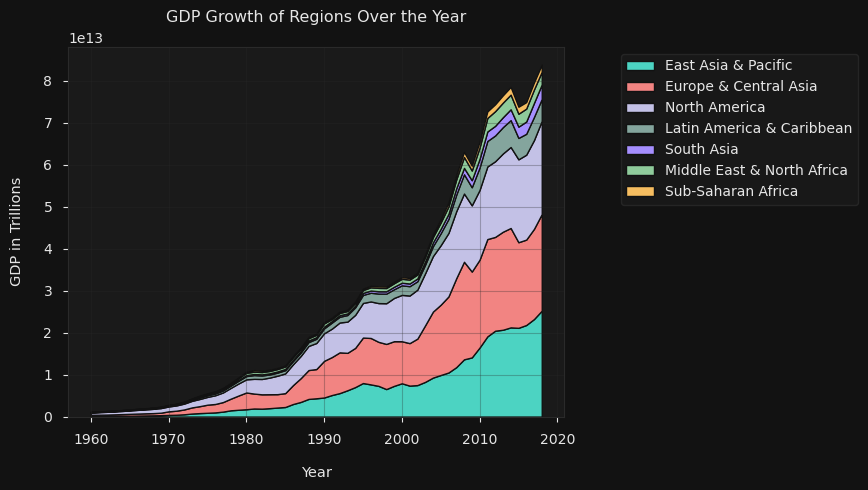

In [13]:
# Plotting Stackchart for showing GDP growth of Regions Over the Years

fig,ax = plt.subplots()

# Sort Regions by there latest GDP (2018)
sort_region = regions_gdp_year.iloc[-1].sort_values(ascending = False).index

# Plotting Stackplot
ax.stackplot(
    regions_gdp_year.index,
    [regions_gdp_year[region] for region in sort_region],
    labels = sort_region,
    colors=[region_colors[region] for region in sort_region]
)

# Setting Title and Labels
ax.set_title('GDP Growth of Regions Over the Year',),
ax.set_xlabel('Year'),
ax.set_ylabel('GDP in Trillions')


ax.legend(bbox_to_anchor = (1.1,1))
plt.show()

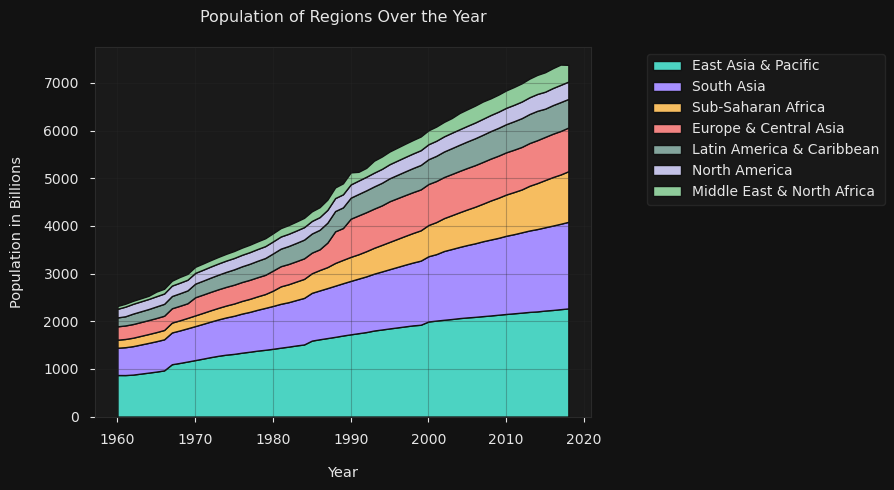

In [14]:
# Plotting Stackchart for showing Population of Regions Over the Years

fig,ax = plt.subplots()

# Sort Regions by there latest GDP (2018)
sort_region = regions_population_years.iloc[-1].sort_values(ascending = False).index

# Plotting Stackplot
ax.stackplot(
    regions_population_years.index,
    [regions_population_years[region] for region in sort_region],
    labels = sort_region,
    colors=[region_colors[region] for region in sort_region]
)

# Setting Title and Labels
ax.set_title('Population of Regions Over the Year',),
ax.set_xlabel('Year'),
ax.set_ylabel('Population in Billions')


ax.legend(bbox_to_anchor = (1.1,1))
plt.show()

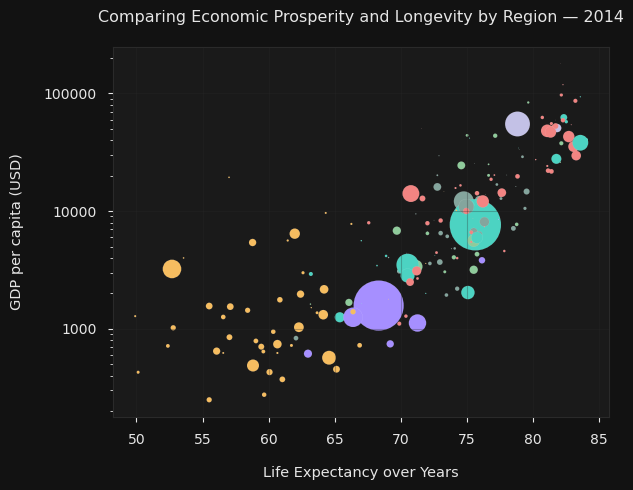

In [15]:
# Creating Bubble Chart

import matplotlib.ticker as mticker

fig,ax = plt.subplots() 

sns.scatterplot(
    data = wb_hdi_2014,
    x = 'life_expectancy',
    y = 'GDP per capita (USD)',
    hue = 'region',
    palette=region_colors,
    size = 'population_millions',
    sizes = (min(wb_hdi_2014['population_millions']), max(wb_hdi_2014['population_millions'])),
    legend = False
).set(yscale = 'log')

ax.set_title('Comparing Economic Prosperity and Longevity by Region — 2014')
ax.set_xlabel('Life Expectancy over Years')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

plt.show()

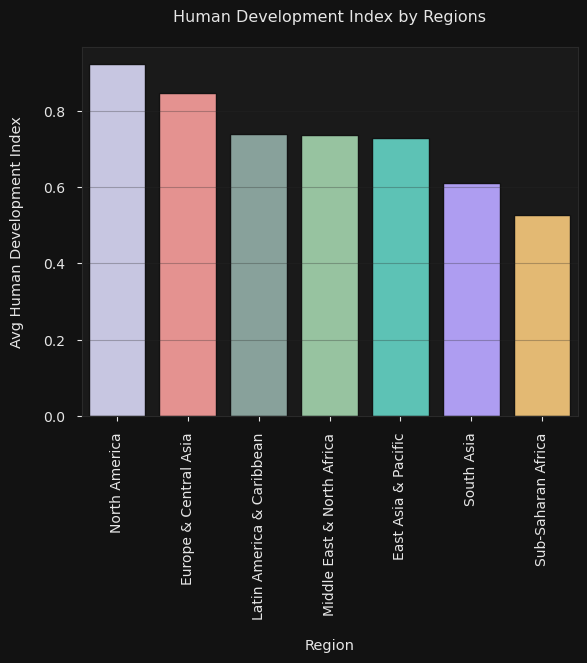

In [16]:
# Bar Chart for showing Human Development ratio across regions

fig,ax = plt.subplots()

sns.barplot(
    data = wb_hdi_by_region,
    x = 'region',
    y = 'hdi_2014',
    hue = 'region',
    palette=region_colors,
    errorbar = None
)

ax.set_title('Human Development Index by Regions'),
ax.set_xlabel('Region'),
ax.set_ylabel('Avg Human Development Index')

plt.xticks(rotation = 90)
plt.show()

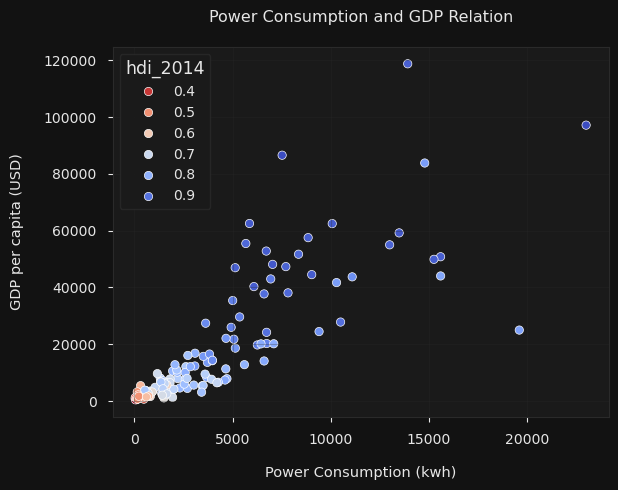

In [17]:
# Scatterplot

fig,ax = plt.subplots()

sns.scatterplot(
    data = wb_hdi_2014.query("country != 'Iceland'"),
    x = 'electric_power_consumption_kwh',
    y = 'GDP per capita (USD)',
    hue = 'hdi_2014',
    palette = 'coolwarm_r'
)

ax.set_title('Power Consumption and GDP Relation'),
ax.set_xlabel('Power Consumption (kwh)')

plt.show()

## Final Report

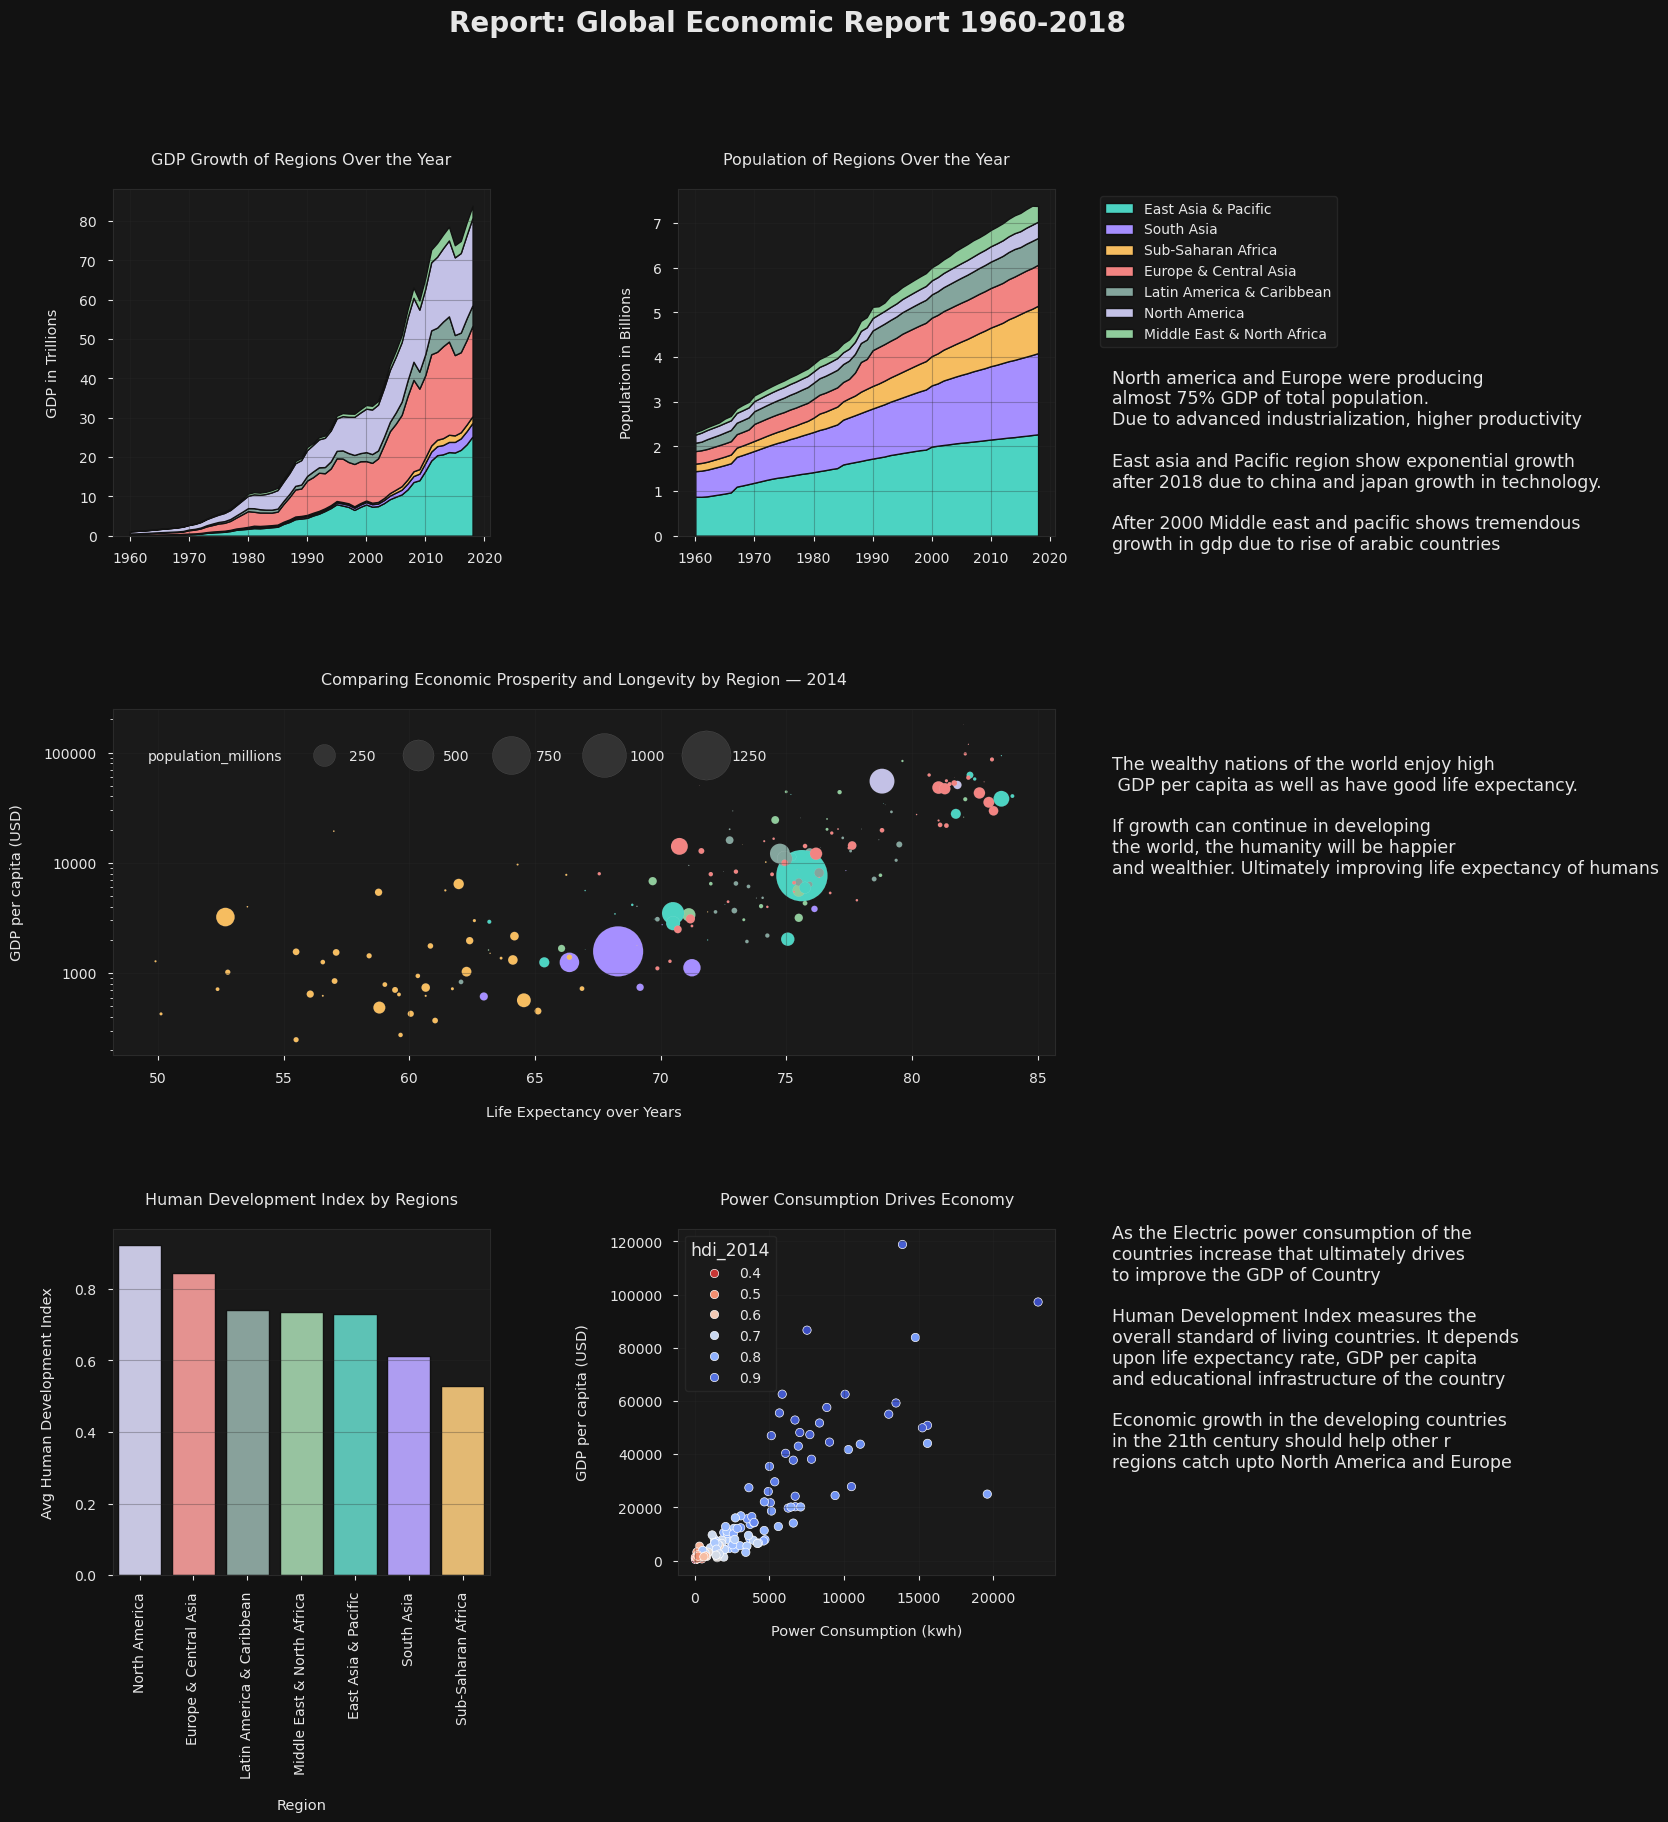

In [18]:
# Importing Gridspec 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18,18))  

gs = gridspec.GridSpec(14, 13)

# Figure report title
fig.suptitle('Report: Global Economic Report 1960-2018',fontsize=20, fontweight='bold',x=0.5, y=0.98 )

# For GDP Stacked Chart [Top left]-----
ax1 = fig.add_subplot(gs[:4, :4])

ax1.stackplot(
    regions_gdp_year.index,
    [regions_gdp_year[region]/1_000_000_000_000 for region in sort_region],
    #labels = sort_region,
    colors=[region_colors[region] for region in sort_region]
)

# Setting Title and Labels
ax1.set_title('GDP Growth of Regions Over the Year',),
#ax1.set_xlabel('Year'),
ax1.set_ylabel('GDP in Trillions')



# For Population stacked chart [Top Mid]--------
ax2 = fig.add_subplot(gs[:4, 5:9])

ax2.stackplot(
    regions_population_years.index,
    [regions_population_years[region]/1000 for region in sort_region],
    labels=sort_region,
    colors=[region_colors[region] for region in sort_region]
)

# Setting Title and Labels
ax2.set_title('Population of Regions Over the Year')
#ax2.set_xlabel('Year')
ax2.set_ylabel('Population in Billions')

ax2.legend(bbox_to_anchor=(1.1, 1))


# Descriptive Text [Top Right]-------
fig.text(
    0.68, 0.68,
    'North america and Europe were producing \nalmost 75% GDP of total population. \nDue to advanced industrialization, higher productivity\n\n'
    'East asia and Pacific region show exponential growth\nafter 2018 due to china and japan growth in technology.\n\n'
    'After 2000 Middle east and pacific shows tremendous\ngrowth in gdp due to rise of arabic countries'
)


# For Bubble Chart [Mid Left]-----
ax3 = fig.add_subplot(gs[5:9,:9])

sns.scatterplot(
    data = wb_hdi_2014,
    x = 'life_expectancy',
    y = 'GDP per capita (USD)',
    hue = 'region',
    palette=region_colors,
    size = 'population_millions',
    sizes = (min(wb_hdi_2014['population_millions']), max(wb_hdi_2014['population_millions']))
).set(yscale = 'log')

ax3.set_title('Comparing Economic Prosperity and Longevity by Region — 2014')
ax3.set_xlabel('Life Expectancy over Years')
ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(wb_hdi_2014['region'].unique())+1

ax3.legend(
    handles[entries_to_skip:],
    labels[entries_to_skip:],
    bbox_to_anchor = (0.7, 0.9),
    borderaxespad = 0.,
    frameon = False,
    ncol = 6
)


# Descriptive Text [Mid Right]-------
fig.text(
    0.68, 0.5,
    'The wealthy nations of the world enjoy high\n GDP per capita as well as have good life expectancy.'
    '\n\nIf growth can continue in developing\nthe world, the humanity will be happier\nand wealthier. Ultimately improving life expectancy of humans'
)


# For Bar Chart [Bottom Left]------
ax4 = fig.add_subplot(gs[10:14 , :4])

sns.barplot(
    data = wb_hdi_by_region,
    x = 'region',
    y = 'hdi_2014',
    hue = 'region',
    palette=region_colors,
    errorbar = None
)

ax4.set_title('Human Development Index by Regions'),
ax4.set_xlabel('Region'),
ax4.set_ylabel('Avg Human Development Index')

plt.xticks(rotation = 90)


# For Scatter Plot [Bottom Mid]-----
ax5 = fig.add_subplot(gs[10:14 , 5:9])

sns.scatterplot(
    data = wb_hdi_2014.query("country != 'Iceland'"),
    x = 'electric_power_consumption_kwh',
    y = 'GDP per capita (USD)',
    hue = 'hdi_2014',
    palette = 'coolwarm_r'
)

ax5.set_title('Power Consumption Drives Economy'),
ax5.set_xlabel('Power Consumption (kwh)')


# Descriptive Text [Bottom Right]-------
fig.text(
    0.68, 0.17,
    'As the Electric power consumption of the \ncountries increase that ultimately drives \nto improve the GDP of Country'
    '\n\nHuman Development Index measures the \noverall standard of living countries. It depends \nupon life expectancy rate, GDP per capita \nand educational infrastructure of the country'
    '\n\nEconomic growth in the developing countries \nin the 21th century should help other r\nregions catch upto North America and Europe'
)

fig.subplots_adjust(wspace=2, hspace=2)
plt.show()
